In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [12]:
! kaggle datasets download tongpython/cat-and-dog

 99% 216M/218M [00:05<00:00, 40.3MB/s]
100% 218M/218M [00:05<00:00, 38.6MB/s]


In [ ]:
! unzip cat-and-dog.zip

In [ ]:
!pip install --upgrade tensorflow

IMPORT L

In [131]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [132]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16 
IMAGE_SIZE = [80, 100]
EPOCHS = 10

In [133]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/training_set/training_set',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/test_set/test_set',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 2023 files belonging to 2 classes.
Using 404 files for validation.


In [37]:
#train_ds = ImageDataGenerator(rescale=1./255) 
#val_ds = ImageDataGenerator(rescale=1./255)

In [134]:
class_names = ['cat', 'dog']

NUM_CLASSES = len(class_names)

In [52]:
#NORMALIZACION
#train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
#val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [135]:
def preprocess_input(image, label):
    image = tf.image.resize(image, IMAGE_SIZE)
    image = image / 255.0  # Normalización de los valores de píxeles
    return image, label

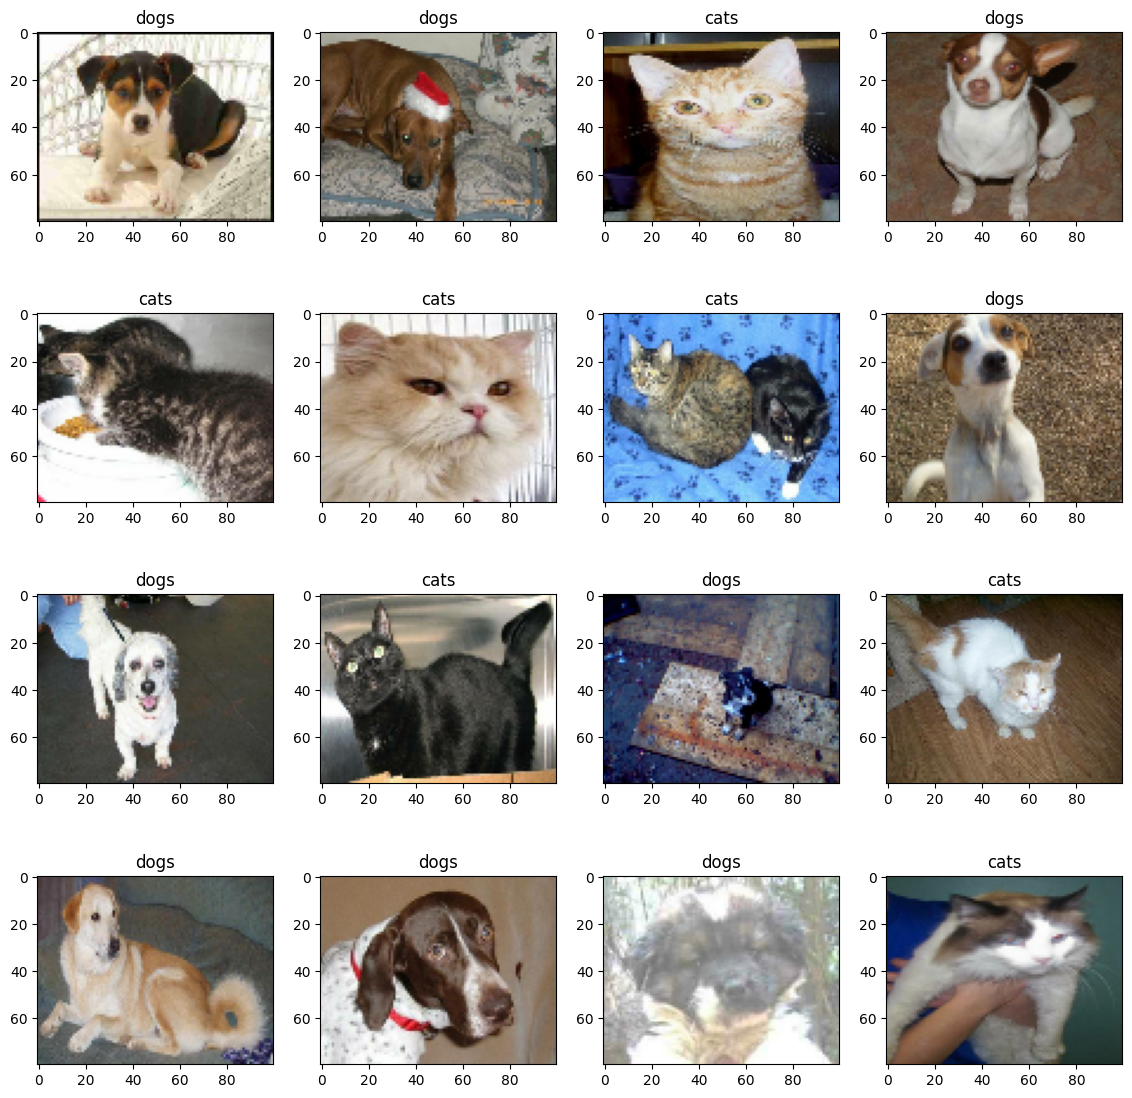

In [136]:
plt.figure(figsize=(14, 14))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("on")

In [137]:
train_ds = train_ds.map(preprocess_input, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(preprocess_input, num_parallel_calls=AUTOTUNE)

In [140]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [141]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [142]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
401/401 [==============================] - 132s 325ms/step - loss: 0.6900 - accuracy: 0.5236 - val_loss: 0.6785 - val_accuracy: 0.5842
Epoch 2/10
401/401 [==============================] - 126s 315ms/step - loss: 0.6840 - accuracy: 0.5473 - val_loss: 0.6981 - val_accuracy: 0.5965
Epoch 3/10
401/401 [==============================] - 128s 318ms/step - loss: 0.6340 - accuracy: 0.6388 - val_loss: 0.6374 - val_accuracy: 0.6386
Epoch 4/10
401/401 [==============================] - 128s 319ms/step - loss: 0.5874 - accuracy: 0.6916 - val_loss: 0.6085 - val_accuracy: 0.6980
Epoch 5/10
401/401 [==============================] - 127s 317ms/step - loss: 0.5260 - accuracy: 0.7356 - val_loss: 0.5460 - val_accuracy: 0.7327
Epoch 6/10
401/401 [==============================] - 128s 318ms/step - loss: 0.4623 - accuracy: 0.7787 - val_loss: 0.5293 - val_accuracy: 0.7153
Epoch 7/10
401/401 [==============================] - 127s 316ms/step - loss: 0.3928 - accuracy: 0.8221 - val_loss: 0.5140 -

In [143]:
loss, accuracy = model.evaluate(val_ds)
print("Loss:", loss)
print("Accuracy:", accuracy)

26/26 [==============================] - 2s 79ms/step - loss: 0.8528 - accuracy: 0.7079
Loss: 0.8527755737304688
Accuracy: 0.7079207897186279


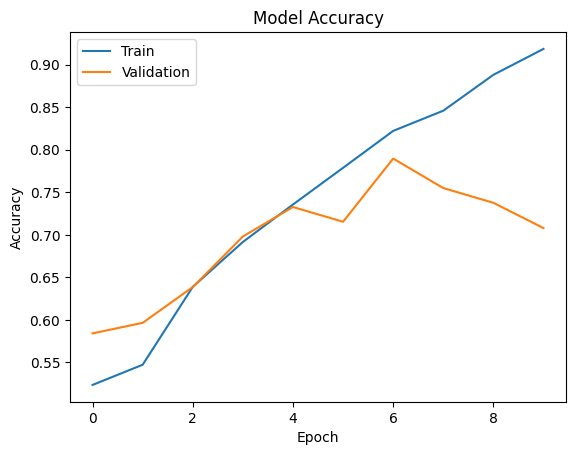

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [145]:
print(accuracy)

0.7079207897186279
